Assignmen 1 vj222hx

Add imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Load the Wage.csv file

In [2]:
csvFile = pd.read_csv("Wage.csv", index_col=0)

Display the number of features and their names:

In [3]:
colNames = csvFile.columns.tolist()
print(f"Number of columns {len(colNames)}")
print(f"Column Names {colNames}")

Number of columns 11
Column Names ['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'logwage', 'wage']


Delete the feature ‘logwage’ and display the number of features and their names again:

In [4]:
csvFile = csvFile.drop("logwage", axis=1)
colNames = csvFile.columns.tolist()
print(f"Number of columns {len(colNames)}")
print(f"Column Names {colNames}")

Number of columns 10
Column Names ['year', 'age', 'maritl', 'race', 'education', 'region', 'jobclass', 'health', 'health_ins', 'wage']


Display the number of data points:

In [5]:
print(f"Number of datapoints {len(csvFile)}")

Number of datapoints 3000


Display the data in a table

In [6]:
print(csvFile.head(20))

        year  age            maritl      race           education  \
231655  2006   18  1. Never Married  1. White        1. < HS Grad   
86582   2004   24  1. Never Married  1. White     4. College Grad   
161300  2003   45        2. Married  1. White     3. Some College   
155159  2003   43        2. Married  3. Asian     4. College Grad   
11443   2005   50       4. Divorced  1. White          2. HS Grad   
376662  2008   54        2. Married  1. White     4. College Grad   
450601  2009   44        2. Married  4. Other     3. Some College   
377954  2008   30  1. Never Married  3. Asian     3. Some College   
228963  2006   41  1. Never Married  2. Black     3. Some College   
81404   2004   52        2. Married  1. White          2. HS Grad   
302778  2007   45       4. Divorced  1. White     3. Some College   
305706  2007   34        2. Married  1. White          2. HS Grad   
8690    2005   35  1. Never Married  1. White          2. HS Grad   
153561  2003   39        2. Marrie

Print a statistic summary of the features

In [7]:
print("year\n", csvFile["year"].describe(), "\n")
print("age\n", csvFile["age"].describe(), "\n")
print(csvFile['maritl'].value_counts(), "\n")
print(csvFile['race'].value_counts(), "\n")
print(csvFile['education'].value_counts(), "\n")
print(csvFile['region'].value_counts(), "\n")
print(csvFile['jobclass'].value_counts(), "\n")
print(csvFile['health'].value_counts(), "\n")
print(csvFile['health_ins'].value_counts(), "\n")
print("wage\n", csvFile['wage'].describe())

year
 count    3000.000000
mean     2005.791000
std         2.026167
min      2003.000000
25%      2004.000000
50%      2006.000000
75%      2008.000000
max      2009.000000
Name: year, dtype: float64 

age
 count    3000.000000
mean       42.414667
std        11.542406
min        18.000000
25%        33.750000
50%        42.000000
75%        51.000000
max        80.000000
Name: age, dtype: float64 

maritl
2. Married          2074
1. Never Married     648
4. Divorced          204
5. Separated          55
3. Widowed            19
Name: count, dtype: int64 

race
1. White    2480
2. Black     293
3. Asian     190
4. Other      37
Name: count, dtype: int64 

education
2. HS Grad            971
4. College Grad       685
3. Some College       650
5. Advanced Degree    426
1. < HS Grad          268
Name: count, dtype: int64 

region
2. Middle Atlantic    3000
Name: count, dtype: int64 

jobclass
1. Industrial     1544
2. Information    1456
Name: count, dtype: int64 

health
2. >=Very Good 

Plot wage compared to age

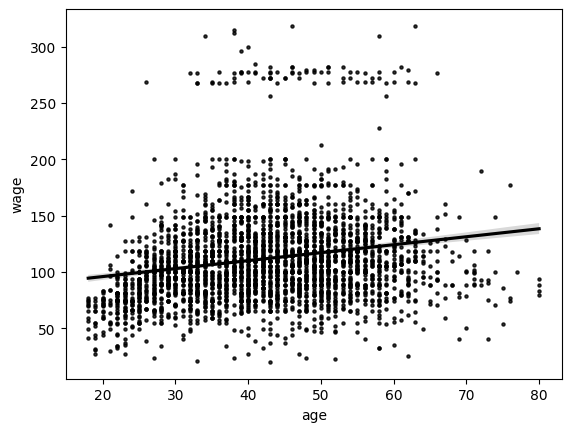

In [8]:
sns.regplot(x="age", y="wage", data=csvFile,  scatter_kws={'s': 5, 'color': 'black'}, line_kws={'color': 'black'})
plt.show()

Perform Shapiro-Wilk normality test

Age: W = 0.9910561787924322, p-value = 9.416337654404108e-13
Wage: W = 0.8795743517164918, p-value = 2.463070103676827e-43


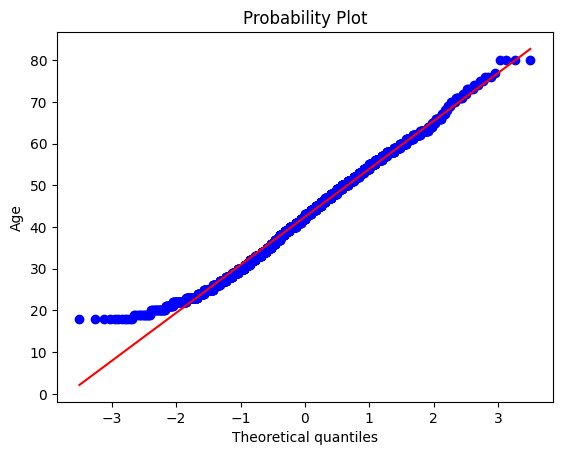

Text(0, 0.5, 'Wage')

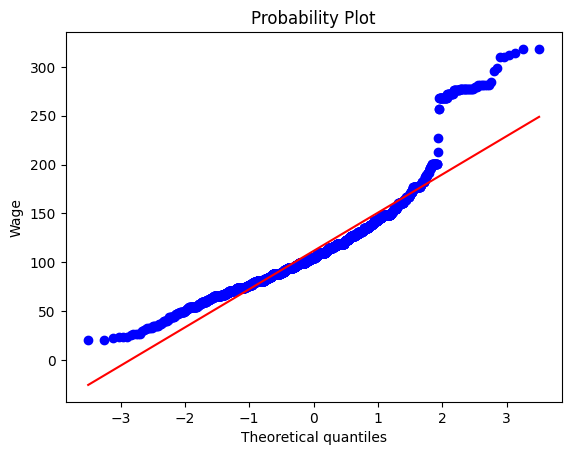

In [9]:
stat, p_value = stats.shapiro(csvFile['age'])
print(f"Age: W = {stat}, p-value = {p_value}")
stat, p_value = stats.shapiro(csvFile['wage'])
print(f"Wage: W = {stat}, p-value = {p_value}")

stats.probplot(csvFile['age'], dist="norm", plot=plt)
plt.ylabel("Age")
plt.show()
stats.probplot(csvFile['wage'], dist="norm", plot=plt)
plt.ylabel("Wage")

Pearson correlation test

In [10]:
corr_coef, p_value = stats.pearsonr(csvFile['age'], csvFile['wage'])
print(f"Correlation Coefficient: {corr_coef}")
print(f"p-value: {p_value}")

Correlation Coefficient: 0.1956372015635886
p-value: 2.900777675211075e-27


Interpretation of results:
From the Shapiro-Wilk test we can conclude that the data is not normally distributed with a 95% confidence interval since both the age and wage p-values are < 0.05. This can also be seen in the qq-plots where the age data is skewed to include more from the younger ages, around 20 years and the wage has some significant outliers towards the higher wages. The pearson correlation test shows the correlation between age and wage. The correlation coefficient is ≈ 0.2 meaning there is some positive correlation between age and wage. The p-value for this test is < 0.05 which means there is statistically significance in this correlation with a 95% confidence. 

Non-numerical features:

All Values:

In [11]:
colNames = csvFile.columns.tolist()

for metric in colNames:
    if metric == "year" or metric == "age" or metric == "wage":
        continue
    print(metric + ":", csvFile[metric].unique().tolist())

maritl: ['1. Never Married', '2. Married', '4. Divorced', '3. Widowed', '5. Separated']
race: ['1. White', '3. Asian', '4. Other', '2. Black']
education: ['1. < HS Grad', '4. College Grad', '3. Some College', '2. HS Grad', '5. Advanced Degree']
region: ['2. Middle Atlantic']
jobclass: ['1. Industrial', '2. Information']
health: ['1. <=Good', '2. >=Very Good']
health_ins: ['2. No', '1. Yes']


Box plots:

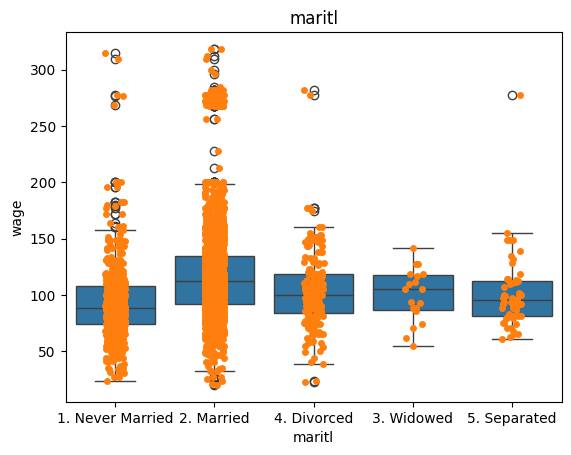

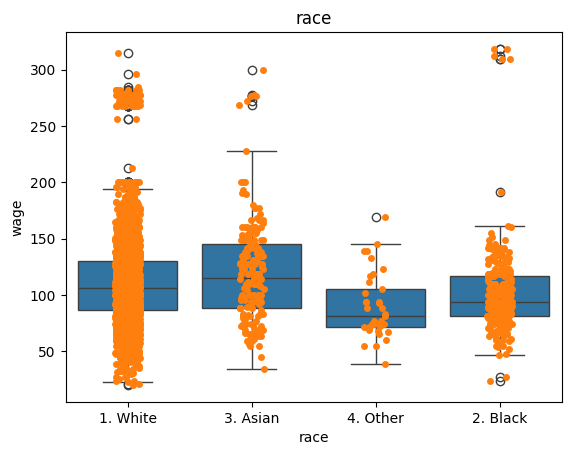

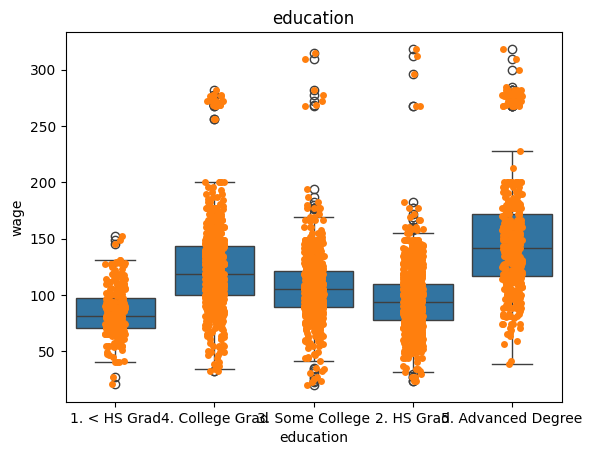

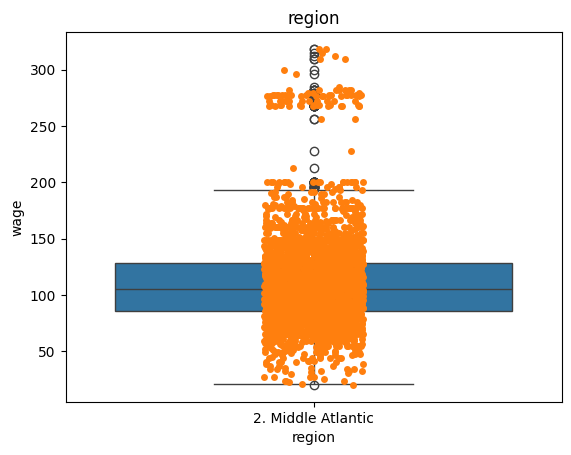

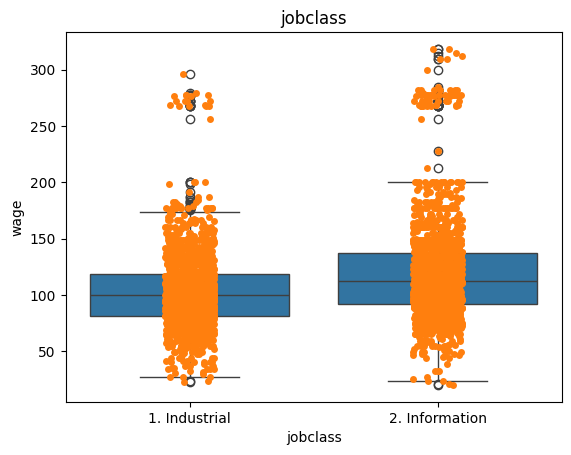

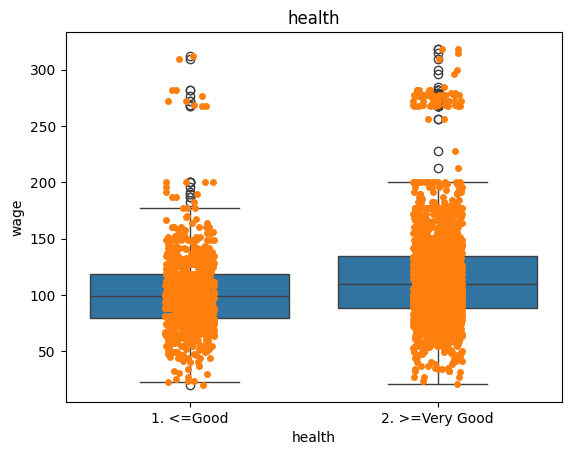

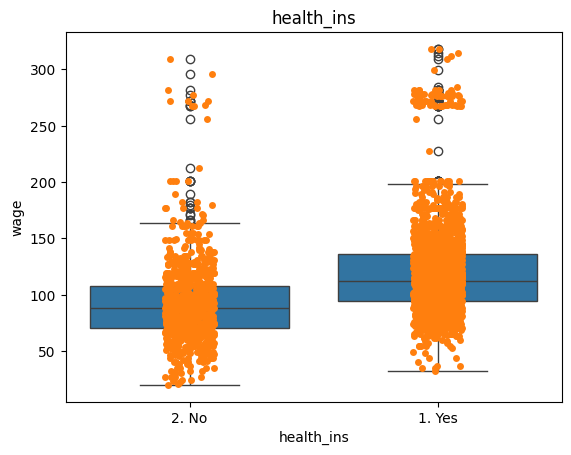

In [12]:
for metric in colNames:
    if metric == "year" or metric == "age" or metric == "wage":
        continue
    sns.boxplot(x=metric, y="wage", data=csvFile)
    sns.stripplot(x=metric, y="wage", data=csvFile)
    plt.title(metric)
    plt.show()



Perform ANOVA test:

In [13]:
for metric in colNames:
    if metric == "region" or metric == "year" or metric == "age" or metric == "wage":
        continue
    groups = []
    for i, group in csvFile.groupby(metric):
        groups.append(group["wage"].values)
    f_stat, p_value = stats.f_oneway(*groups)
    print(metric + ":", f_stat, p_value)

maritl: 55.95958463906133 1.4012011241609731e-45
race: 12.236674234711575 5.890230292195143e-08
education: 229.80592053052388 2.915931889600402e-172
jobclass: 134.07258457516087 2.3081861116745258e-30
health: 71.22664064394343 4.8864044831929634e-17
health_ins: 314.9079639235259 4.465783160823236e-67


In the ANOVA test we can see that all values are < 0.05 which means that there is a signifiant correlation between wage and the different metrics.

Maritl: The outliers in this graph are married, who have a higher wage, seperated and never married typically have a lower wage

Race: Here we can see that asian have the highest wage and others have the lowest

Education: Here we can see that higher education correlates with higher wages. 

Region: There are only people from the middle atlantic thus we also cant do ANOVA

Job class: Here we can see that Information has higher wages than Industrial

Health: People with very good health have higher wages

Health Ins: People with health insurance has a higher wage then people without. 